<h1 align=center><font size=5>Data Analysis with Python</font></h1>

<h1>Model Evaluation and Refinement</h1>

We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are. 
<h1>Table of content</h1>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>

In [1]:
import wget
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv')

'module_5_auto.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('module_5_auto.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
df=df._get_numeric_data()

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [8]:
df.drop("Unnamed: 0.1",axis="columns",inplace=True)

In [9]:
df.drop("Unnamed: 0",axis="columns",inplace=True)

In [10]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [11]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Functions for plotting

In [12]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [13]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1: Training and Testing

An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y:


In [14]:
y_data=df["price"]

In [15]:
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [16]:
x_data=df.drop('price',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1)

In [20]:
print("Number of test samples",x_test.shape[0])

Number of test samples 41


In [21]:
print("Number of train samples",x_train.shape[0])

Number of train samples 160


In [22]:
x_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
110,0,122,114.2,0.955790,0.950000,56.7,3285,120,3.46,2.19,8.4,95.0,5000.0,19,24,12.368421,0,1
122,3,186,94.5,0.811629,0.948611,50.2,2778,151,3.94,3.11,9.5,143.0,5500.0,19,27,12.368421,0,1
58,1,129,98.8,0.854397,0.923611,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,9.038462,0,1
14,0,122,103.5,0.908217,0.929167,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,14.687500,0,1
56,1,129,98.8,0.854397,0.923611,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,9.038462,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,104,99.1,0.896684,0.923611,56.1,2847,121,3.54,3.07,9.0,160.0,5500.0,19,26,12.368421,0,1
137,0,102,97.2,0.826526,0.908333,52.5,2145,108,3.62,2.64,9.5,82.0,4800.0,32,37,7.343750,0,1
72,1,122,102.7,0.857280,0.944444,54.8,2910,140,3.78,3.12,8.0,175.0,5000.0,19,24,12.368421,0,1
140,0,102,97.0,0.826526,0.908333,54.3,2385,108,3.62,2.64,9.0,82.0,4800.0,24,25,9.791667,0,1


In [23]:
y_train

110    16695.0
122    22018.0
58     10595.0
14     30760.0
56      8845.0
        ...   
133    18620.0
137     7126.0
72     16503.0
140     9233.0
37      9095.0
Name: price, Length: 160, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[["horsepower"]],y_train)
lre.score(x_train[["horsepower"]],y_train)

0.6719873936874949

## Cross-validation Score

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
Rcross=cross_val_score(lre,x_data[["horsepower"]],y_data,cv=4)

In [29]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [30]:
print("The mean of Rcross is",Rcross.mean(),"and the Standard deviation is",Rcross.std())

The mean of Rcross is 0.522009915042119 and the Standard deviation is 0.2911839444756029


In [31]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]],y_train)

LinearRegression()

In [34]:
yhat_train=lr.predict(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]])

In [35]:
yhat_train[0:5]

array([14598.64814222, 18459.60835371, 11235.24855175, 27490.04421394,
       11235.24855175])

In [36]:
yhat_test=lr.predict(x_test[["horsepower","curb-weight","engine-size","highway-mpg"]])

In [37]:
yhat_test[:5]

array([11457.56050541,  5966.17033563, 11313.13362185,  6839.1134896 ,
       15765.36249767])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


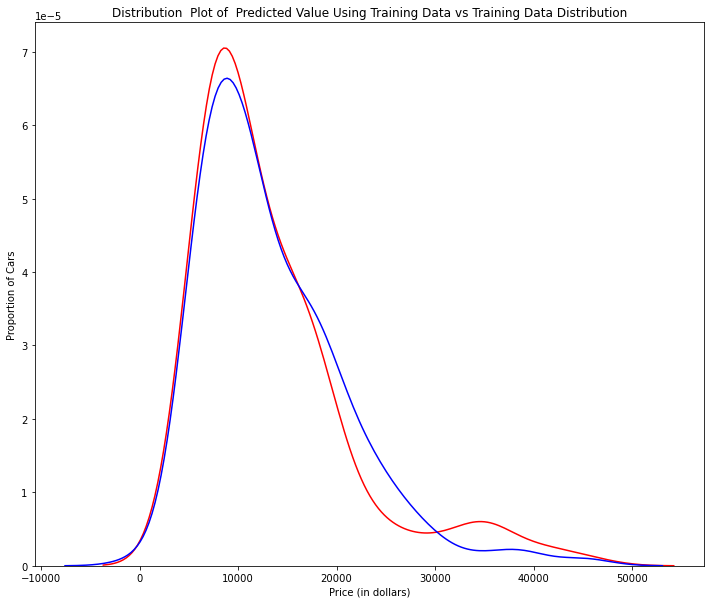

In [39]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


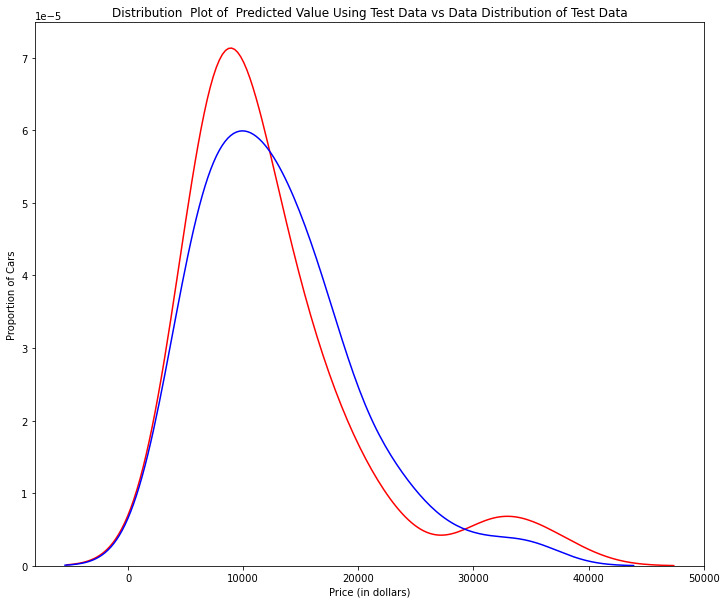

In [40]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for testing and the rest for trai

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.55,random_state=1)

In [43]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [44]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [45]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([11986.55859492,  7283.8132008 ,  9741.93991998,  8373.13713744,
       14604.67905034])

In [46]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [11986.55859492  7283.8132008   9741.93991998  8373.13713744]
True values: [ 9549.  6229. 10245.  7295.]


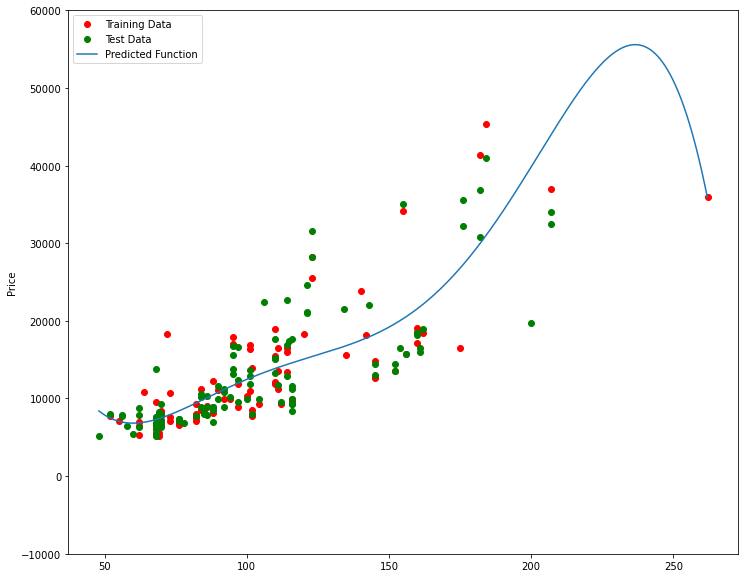

In [47]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [48]:
poly.score(x_train_pr, y_train)

0.6931068935314579

In [49]:
poly.score(x_test_pr, y_test)

0.6301992709889749

Text(3, 0.75, 'Maximum R^2 ')

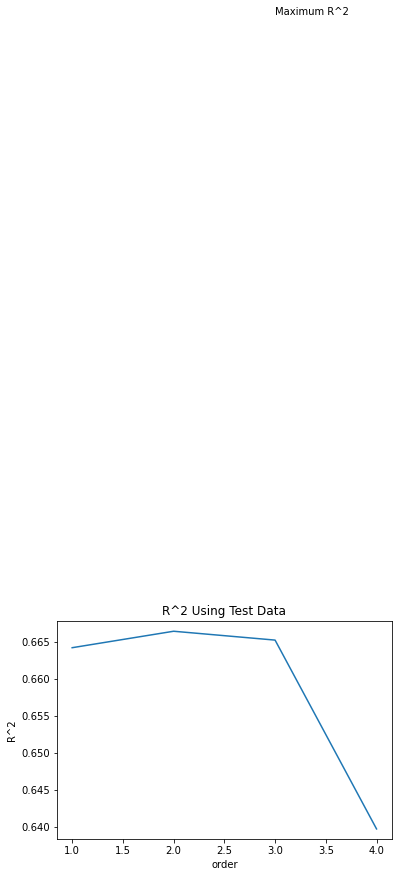

In [50]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [51]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [52]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

## Ridge Regression

 In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data

In [53]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [55]:
from sklearn.linear_model import Ridge

In [56]:
Ridgemodel = Ridge(alpha=0.1)

In [57]:
Ridgemodel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [58]:
yhat = Ridgemodel.predict(x_test_pr)

In [59]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 8794.19216484  6166.21160816 11322.86839058  4190.81000757]
test set : [ 9549.  6229. 10245.  7295.]


In [60]:
#We select the value of Alfa that minimizes the test error, for example, we can use a for loop. 
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

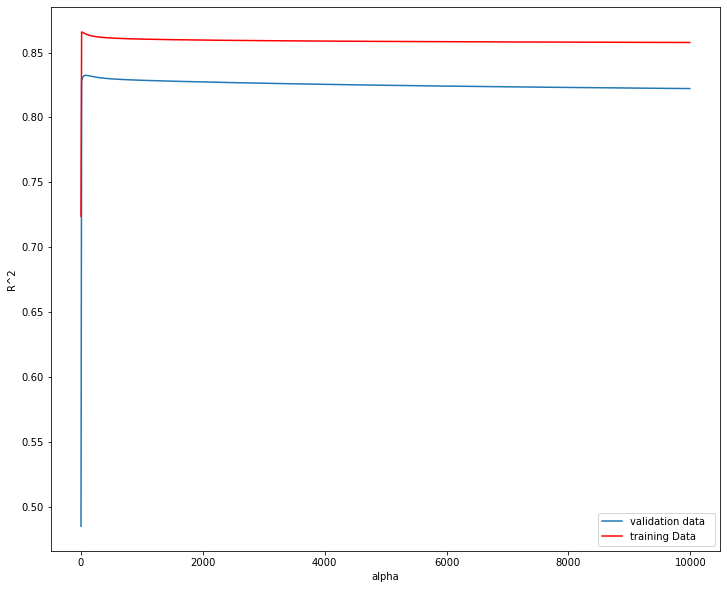

In [61]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [64]:
RR=Ridge()
RR

Ridge()

In [65]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [66]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [67]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [68]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8142090658453383